In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


---

1. [10점] 다음 프로그램에서 a, b, text_idx 가 어떤 정보를 담고 있는지 간략히 설명하여라. 


```
text = “I love soccer”
a = tuple(set(text))
b = {c:j for j,c in enumerate(a)}
text_idx = [b[c] for c in text] 
```



---

In [ ]:
text = "I love soccer"
a = tuple(set(text))
b = {c:j for j,c in enumerate(a)}
text_idx = [b[c] for c in text]
print("a\t ", a)
print("b\t ", b)
print("text_idx ", text_idx)

a	  (' ', 'o', 'c', 'I', 'r', 'l', 'v', 'e', 's')
b	  {' ': 0, 'o': 1, 'c': 2, 'I': 3, 'r': 4, 'l': 5, 'v': 6, 'e': 7, 's': 8}
text_idx  [3, 0, 5, 1, 6, 7, 0, 8, 1, 2, 2, 7, 4]


---

2. [10점] a = [[[1,2],[3,4]],[[‘a’,‘b’],[‘c’,‘d’]]] 를 [[[1,3],[2,4]],[[‘a’,‘c’],[‘b’,‘d’]]] 로 바꾸는 프로그램을 작성하라

---

In [ ]:
a = [[[1,2],
      [3,4]],
     [['a','b'],
      ['c','d']]]

import numpy as np
np_a = np.array(a)
a = np.transpose(np_a, axes=(0,2,1)).tolist()

# a[0][0][1], a[0][1][0] = a[0][1][0], a[0][0][1]
# a[1][0][1], a[1][1][0] = a[1][1][0], a[1][0][1]
print(a)

[[['1', '3'], ['2', '4']], [['a', 'c'], ['b', 'd']]]


---

3. [10점]  tensor t=tf.constant([[[[1,1],[2,2]][[3,3],[4,4]],[[5,5],[6,6]]]]) 가 있다.

(a) [5점] rank 와 shape은 얼마인가? 

(b) [5점] new_t = tf.reshape(t, [3, -1]) 에서 new_t 는 어떤  tensor 가 되는가? 

---

In [ ]:
import tensorflow as tf
sess = tf.InteractiveSession()

t=tf.constant([
                [
                  [[1,1],[2,2]],
                  [[3,3],[4,4]],
                  [[5,5],[6,6]]
                 ]
               ])
print("Rank  : {}\nShape : {}\n".format(tf.rank(t).eval(), t.shape))

new_t = tf.reshape(t, [3, -1])
print("Rank  : {}\nShape : {}\n".format(tf.rank(new_t).eval(), new_t.shape))

Rank  : 4
Shape : (1, 3, 2, 2)

Rank  : 2
Shape : (3, 4)



---

4. [20점] 다음 물음에 한 문장으로 답하여라.  

(a) [5점] Learning에서 input data를 normalization을 하는 이유는 무엇인가?

(b) [5점] Deep learning에서 sigmoid 함수를 activation 함수로 쓰지 않는 주된 이유는 무엇인가? 

(c) [5점] 크기가 12,000인 dataset을 training 할 때 epoch = 50, batch size = 100 으로 하여 training을 하였다. weight가 update 되는 횟수는 얼마인가? 

(d) [5점] overfitting 은 무엇을 의미하며 이를 줄이기 위한 방안은 무엇인가? 

---

(a) 아래 그림 참고

(b) Sigmoid 함수는 여러번 거치면 vanishing 현상이 누적되어 이전 레이어로 loss 값이 전달이 잘 되지 않는다. 따라서 ReLU 등을 사용한다.

(c) 50 X (12000 / 100) = 6000

(d) 큰 데이터 셋을 사용하고, 정규화 (Regularization)를 한다.


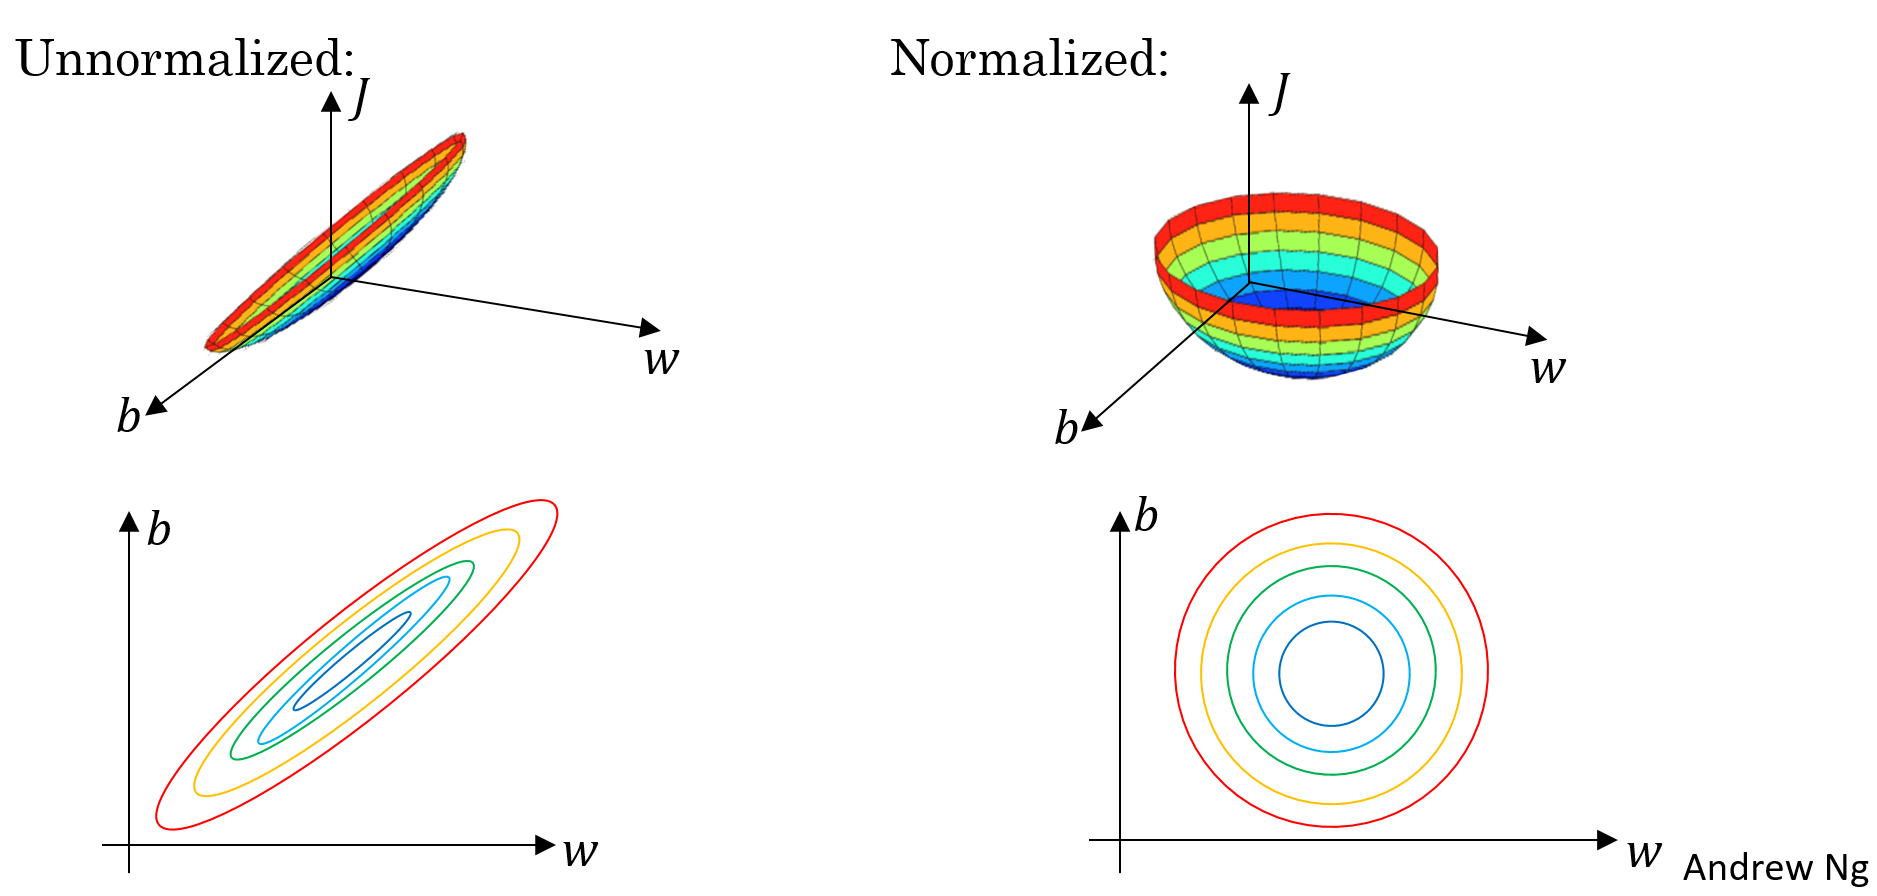

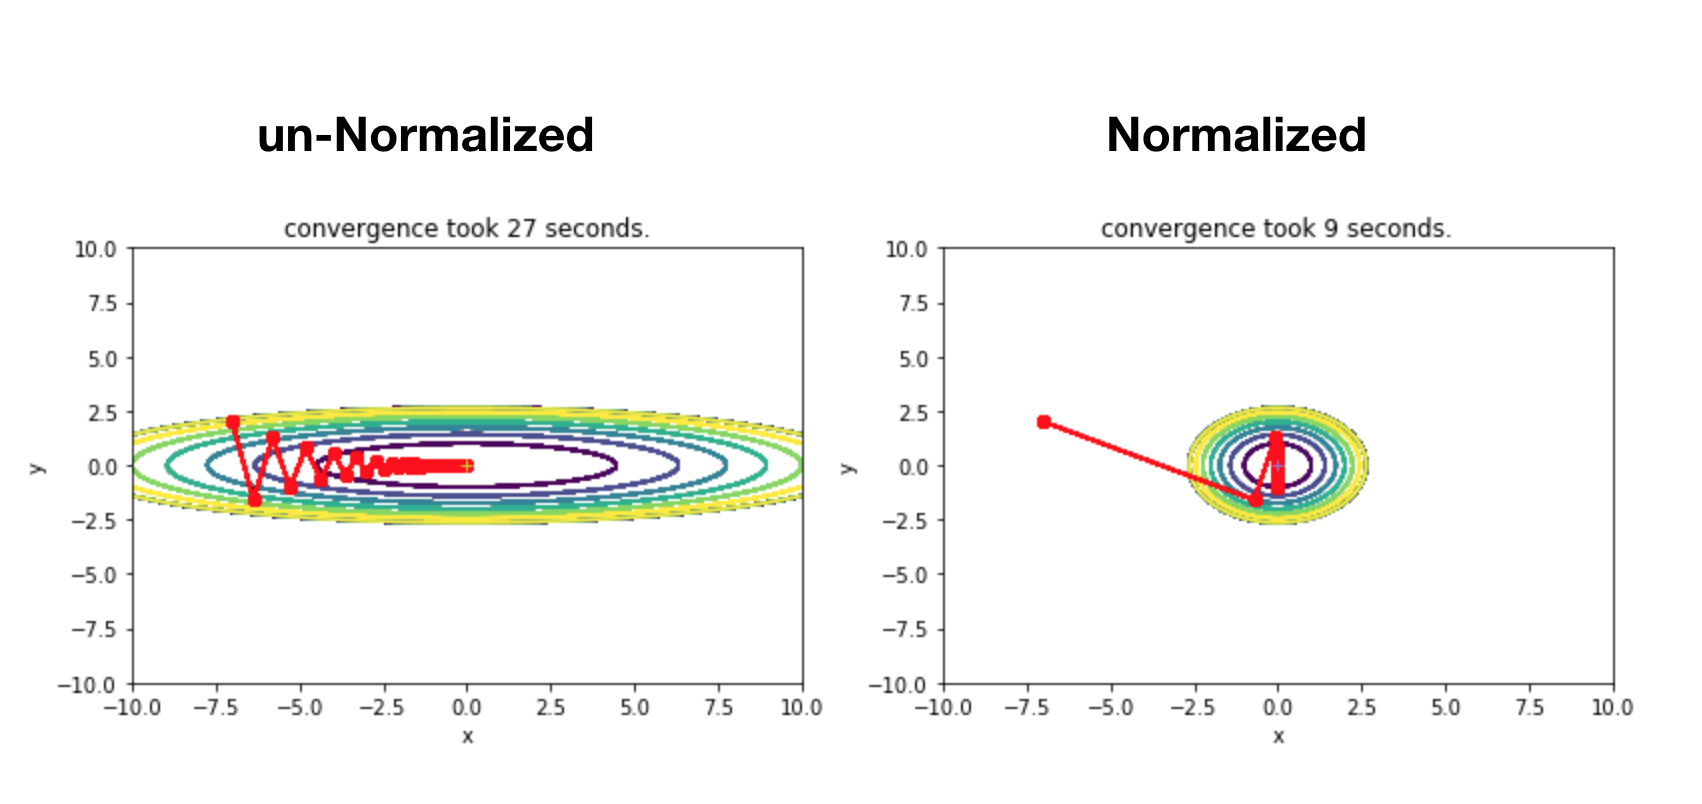

https://jsideas.net/batch_normalization/

---

4. [20점] MNIST dataset classification을 다음과 같이 2가지 방법으로 구현을 할 때에 필요한 곱셈의 개수는 각각 얼마인가? 

(a) [10점] DNN implementation

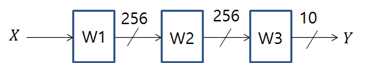

(b) [10점] CNN implementation  
 
 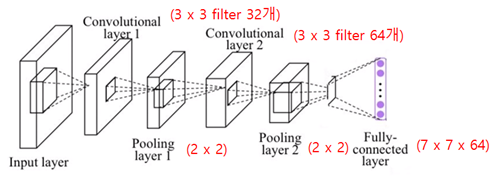

---

(a) (28 x 28) x 256 + 256 x 256 + 256 x 10 = 268800

(b) 3 x 3 x (28 x 28) x 1 x 32 + 3 x 3 x (14 x 14) x 32 x 64 + (7 x 7 x 64 x 10) = 3838954

---

5. [15점] [32, 32, 3] 크기의 image가 다음 layer를 거치고 나면 shape이 어떻게 변하는지 답해보자.

(a) [5점] kernel의 width와 height가 3이고, filter 수가 16이며, Padding은 ‘SAME’이고 stride는 (1,1)인 Convolutional Layer

(b) [5점] kernel의 width와 height가 3이고, filter 수가 4이며, Padding은 ’VALID’이고 stride는 (2,2)인 Convolutional Layer

(c) [5점] kernel의 width와 height가 2이며, Padding=’SAME’이고 stride는 (2,2)인 MaxPooling Layer

---

In [ ]:
images = tf.random_normal(shape=(1, 32, 32, 3))

a_layer = tf.keras.layers.Conv2D(16, kernel_size=3, strides=(1, 1), padding='SAME')
print("(a) ", a_layer(images).shape)

b_layer = tf.keras.layers.Conv2D(4, kernel_size=3, strides=(2, 2), padding='VALID')
print("(b) ",b_layer(images).shape)

c_layer = tf.keras.layers.MaxPool2D(pool_size=2, strides=(2, 2), padding='SAME')
print("(c) ",c_layer(images).shape)

(a)  (1, 32, 32, 16)
(b)  (1, 15, 15, 4)
(c)  (1, 16, 16, 3)


---

6. [15점] 다음 CIFAR-10 데이터셋을 분류하는 softmax classifier에서 CIFAR-10 데이터셋은 각각 [32, 32, 3] 크기의 image와, 각각 0~9까지의 숫자로 나타나는 label로 이루어져있다. 올바른 tensorflow graph를 만들도록 코드를 수정하여라.



```
images = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
labels = tf.placeholder(tf.int32, shape=[None, 1])

W = tf.Variable(tf.random_normal([32 * 32 * 3, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(images, W) + b
logits = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
train = tf.train.GradientDescentOptimizer(1e-3).minimize(cost)

prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction, tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
```


---

In [ ]:
import tensorflow as tf

images = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
labels = tf.placeholder(tf.int32, shape=[None, 1])

X = tf.reshape(images, [-1, 32 * 32 * 3]) # fully connected layer에 들어갈 수 있도록 reshape
Y = tf.one_hot(labels, 10) # Y를 one-hot화 (tf.nn.softmax_cross_entropy_with_logits를 사용하기 위해)
Y = tf.reshape(Y, [-1, 10])

W = tf.Variable(tf.random_normal([32 * 32 * 3, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + b
# logits = tf.nn.softmax(logits) # tf.nn.softmax_cross_entropy_with_logits에 이미 포함

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
train = tf.train.GradientDescentOptimizer(1e-3).minimize(cost)

prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(train_x, train_y), (test_x, test_y) = load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

In [ ]:
batch_size = 100
train_steps_in_epoch = train_x.shape[0] // batch_size
log_interval = 100
max_epoch = 15

# config = tf.ConfigProto(device_count = {'GPU' : 0})
# with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(max_epoch):
        for i in range(train_steps_in_epoch):
            start = i*batch_size
            end = (i+1)*batch_size
            batch_x, batch_y = train_x[start:end], train_y[start:end]
            _, cost_val = sess.run([train, cost], feed_dict={images: batch_x, labels: batch_y})
            if i % log_interval == 0:
                print("steps: %d, loss: %f" % (i, cost_val))

        test_accuracy = sess.run(accuracy, feed_dict={images: test_x, labels: test_y})
        print("%d epoch's Test accuracy: %f" % (epoch+1, test_accuracy))

steps: 0, loss: 31.990473
steps: 100, loss: 22.947243
steps: 200, loss: 20.111408
steps: 300, loss: 16.950443
steps: 400, loss: 17.595959
1 epoch's Test accuracy: 0.118800
steps: 0, loss: 16.495070
steps: 100, loss: 18.026657
steps: 200, loss: 17.426329
steps: 300, loss: 15.232277
steps: 400, loss: 16.054203
2 epoch's Test accuracy: 0.121900
steps: 0, loss: 15.038103
steps: 100, loss: 16.915920
steps: 200, loss: 16.521065
steps: 300, loss: 14.513423
steps: 400, loss: 15.209170
3 epoch's Test accuracy: 0.127500
steps: 0, loss: 14.503633
steps: 100, loss: 15.999121
steps: 200, loss: 15.762123
steps: 300, loss: 13.849944
steps: 400, loss: 14.540697
4 epoch's Test accuracy: 0.131000
steps: 0, loss: 14.038361
steps: 100, loss: 15.226868
steps: 200, loss: 15.084109
steps: 300, loss: 13.266219
steps: 400, loss: 14.003881
5 epoch's Test accuracy: 0.134000
steps: 0, loss: 13.622833
steps: 100, loss: 14.568779
steps: 200, loss: 14.481592
steps: 300, loss: 12.766810
steps: 400, loss: 13.561519
6 